In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.rcParams["figure.dpi"] = 200

In [3]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv",keep_default_na = False, skipfooter = 3,engine='python')

In [4]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [5]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [6]:
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2019     2065.036398
1     Afghanistan  2018     2033.779002
2     Afghanistan  2017     2058.383832
3     Afghanistan  2016     2057.062164
4     Afghanistan  2015     2068.265904
...           ...   ...             ...
6863     Zimbabwe  1994     3263.934978
6864     Zimbabwe  1993     3033.504852
6865     Zimbabwe  1992     3054.889178
6866     Zimbabwe  1991     3426.598094
6867     Zimbabwe  1990     3324.348171

[6868 rows x 3 columns]


In [7]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB
None


In [8]:
print(gdp_df["Year"].value_counts())

2013    238
2014    238
2016    238
2015    238
2017    238
2012    237
2018    237
2011    237
2009    236
2010    236
2007    235
2008    235
2006    235
2004    234
2005    234
2002    233
2003    233
2001    232
2019    231
2000    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64


In [9]:
print(gdp_df["Country"].value_counts())

IDA blend                    30
Turkey                       30
European Union               30
Jordan                       30
Seychelles                   30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64


In [10]:
gdp_2014 = gdp_df[gdp_df["Year"] == 2014]

In [11]:
print(gdp_2014)

                  Country  Year  GDP_Per_Capita
5             Afghanistan  2014     2102.385234
23                Albania  2014    11623.866679
53                Algeria  2014    11512.705405
83                 Angola  2014     8239.828837
113   Antigua and Barbuda  2014    18104.241470
...                   ...   ...             ...
6727              Vietnam  2014     6098.489609
6757   West Bank and Gaza  2014     5967.073437
6783                World  2014    15189.648507
6813               Zambia  2014     3450.046561
6843             Zimbabwe  2014     2955.240287

[238 rows x 3 columns]


In [12]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


(array([146.,  41.,  25.,  18.,   4.,   1.,   2.,   0.,   0.,   1.]),
 array([   822.61045782,  16391.76279701,  31960.91513621,  47530.06747541,
         63099.2198146 ,  78668.3721538 ,  94237.524493  , 109806.67683219,
        125375.82917139, 140944.98151059, 156514.13384978]),
 <BarContainer object of 10 artists>)

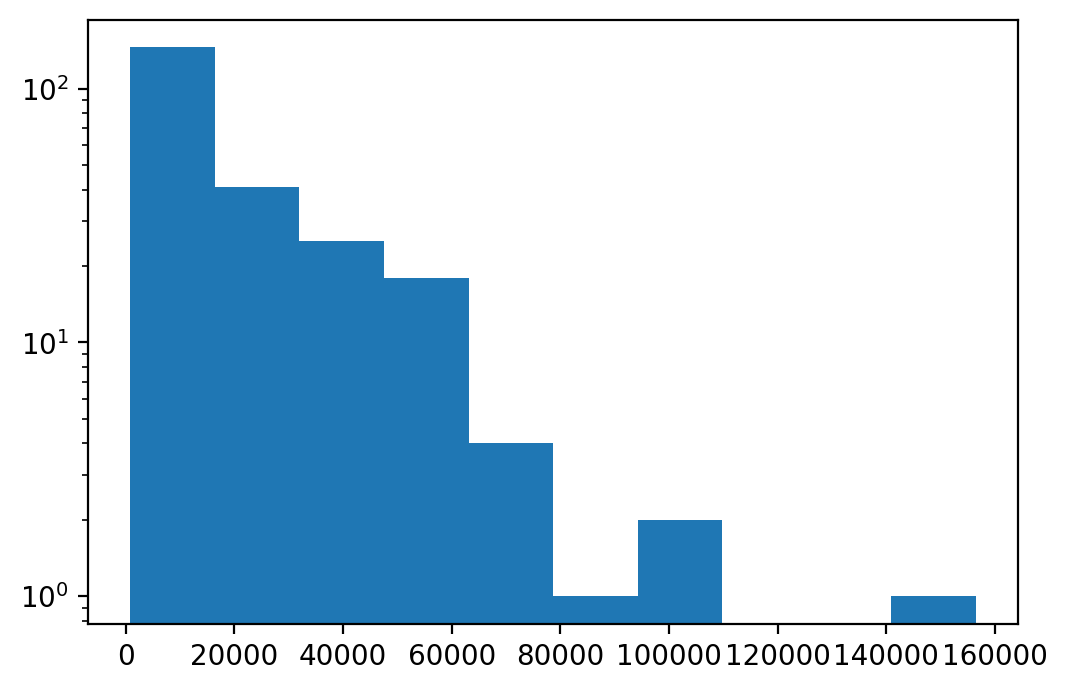

In [13]:
plt.hist(gdp_2014["GDP_Per_Capita"],bins = 10, log = True)

In [14]:
gdp_2014_sorted = gdp_2014.sort_values('GDP_Per_Capita',ascending = False)

In [15]:
print(gdp_2014_sorted["Country"][:5])

3721    Macao SAR, China
3691          Luxembourg
5138               Qatar
5464           Singapore
561              Bermuda
Name: Country, dtype: object


In [16]:
print(gdp_2014_sorted["Country"][-5:])

4528                       Niger
1422             Dem. Rep. Congo
3781                      Malawi
827                      Burundi
1047    Central African Republic
Name: Country, dtype: object


In [17]:
gdp_pivoted = pd.pivot_table(gdp_df[(gdp_df["Year"] == (2017)) | (gdp_df["Year"] == (1990))], values = "GDP_Per_Capita", index = ["Country"], columns = "Year", dropna = True)
gdp_pivoted = gdp_pivoted.dropna()
gdp_pivoted.index.name = None
print(gdp_pivoted)

Year                         1990          2017
Albania               4842.734635  12811.759436
Algeria               8746.352901  11737.409353
Angola                5783.429064   7310.901738
Antigua and Barbuda  15459.551675  19840.076123
Arab World            9694.667544  14555.474921
...                           ...           ...
Vanuatu               2888.309393   3116.645194
Vietnam               1673.249634   7155.745829
World                 9680.269697  16253.385518
Zambia                2190.182814   3485.005238
Zimbabwe              3324.348171   3028.245976

[207 rows x 2 columns]


In [18]:
gdp_pivoted["Percent_Change"] = 100*(gdp_pivoted[2017]-gdp_pivoted[1990]) / gdp_pivoted[1990]
print(gdp_pivoted)

Year                         1990          2017  Percent_Change
Albania               4842.734635  12811.759436      164.556297
Algeria               8746.352901  11737.409353       34.197756
Angola                5783.429064   7310.901738       26.411194
Antigua and Barbuda  15459.551675  19840.076123       28.335391
Arab World            9694.667544  14555.474921       50.138980
...                           ...           ...             ...
Vanuatu               2888.309393   3116.645194        7.905517
Vietnam               1673.249634   7155.745829      327.655604
World                 9680.269697  16253.385518       67.902197
Zambia                2190.182814   3485.005238       59.119377
Zimbabwe              3324.348171   3028.245976       -8.907075

[207 rows x 3 columns]


In [19]:
gdp_neg = gdp_pivoted[gdp_pivoted["Percent_Change"] < 0]
print(gdp_neg["Percent_Change"].count())

17


In [20]:
print(gdp_pivoted["Percent_Change"].sort_values(ascending = False)[:1])
print(gdp_pivoted["Percent_Change"].sort_values(ascending = False)[1:2])

Equatorial Guinea    2068.404561
Name: Percent_Change, dtype: float64
China    907.406281
Name: Percent_Change, dtype: float64


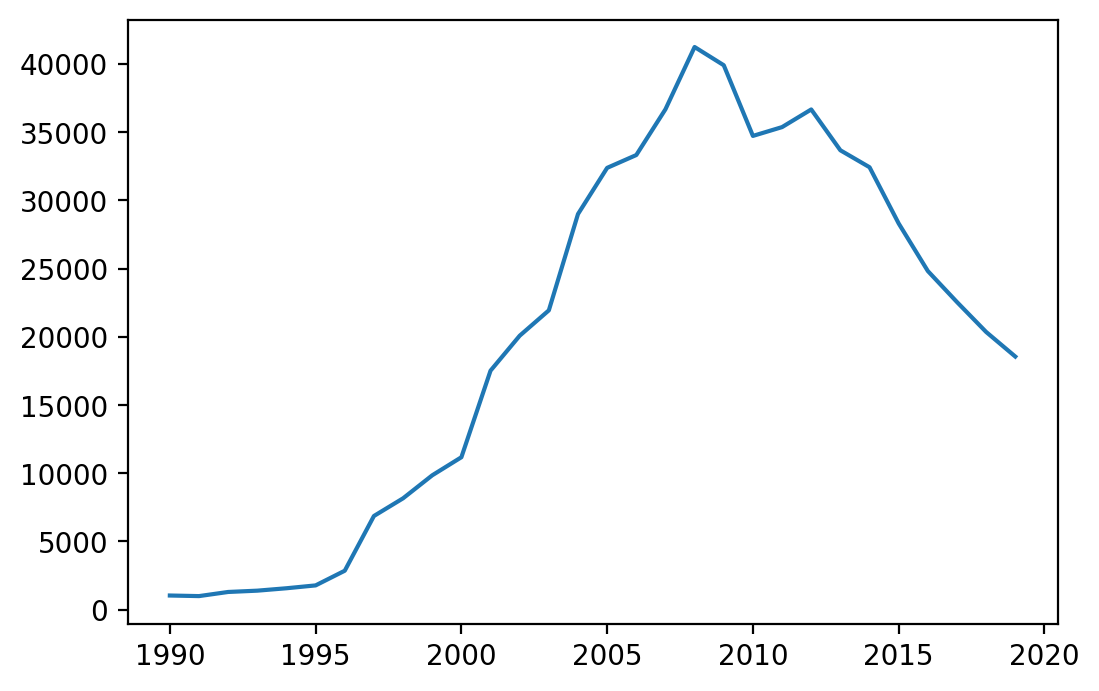

In [21]:
one_gdp_g = gdp_df[gdp_df["Country"] == "Equatorial Guinea"]
plt.plot(one_gdp_g["Year"],one_gdp_g["GDP_Per_Capita"])

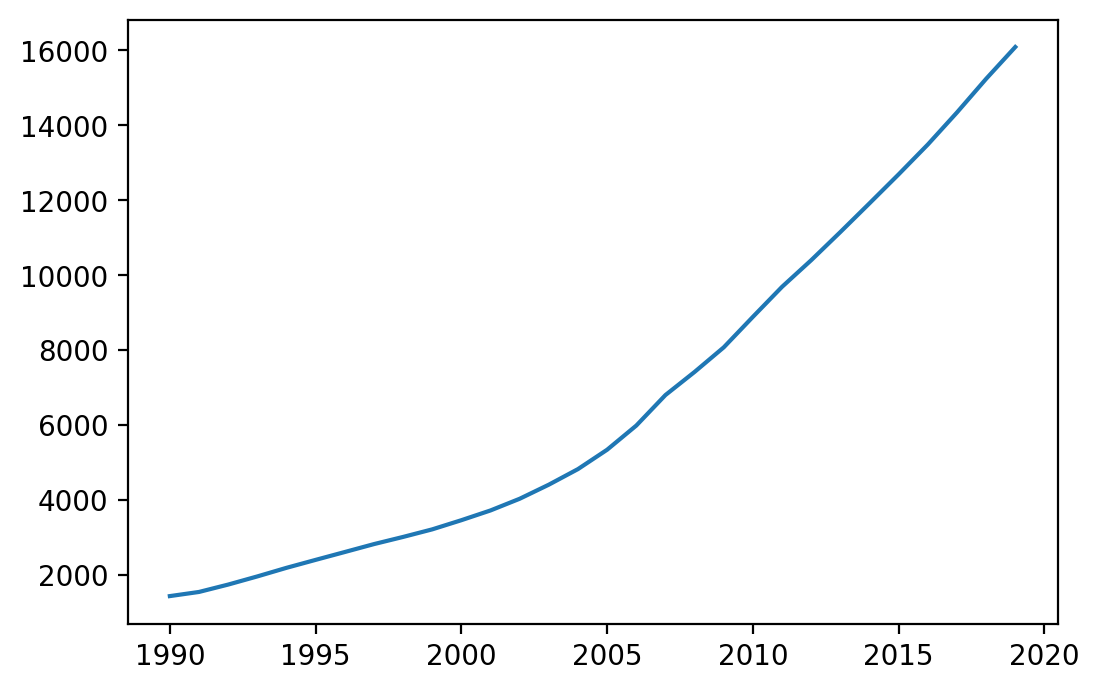

In [22]:
two_gdp_g = gdp_df[gdp_df["Country"] == "China"]
plt.plot(two_gdp_g["Year"],two_gdp_g["GDP_Per_Capita"])

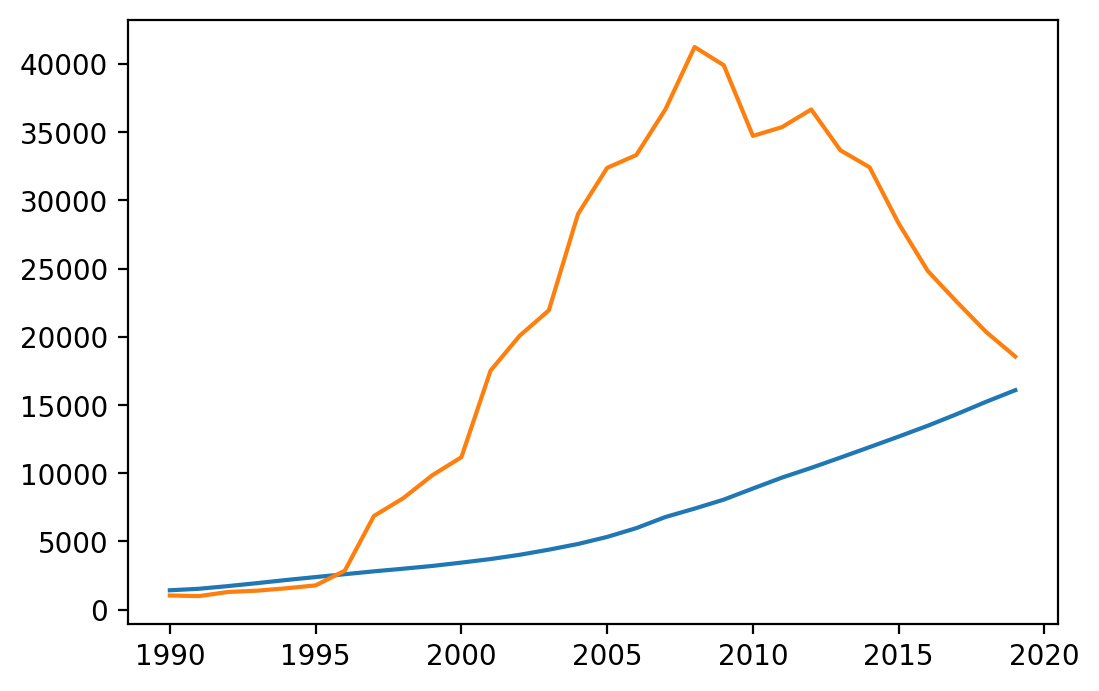

In [23]:
plt.plot(two_gdp_g["Year"],two_gdp_g["GDP_Per_Capita"])
plt.plot(one_gdp_g["Year"],one_gdp_g["GDP_Per_Capita"])

In [24]:
continents = pd.read_csv("../data/continents.csv")

In [25]:
print(continents)

    Continent             Country
0        Asia         Afghanistan
1      Europe             Albania
2      Africa             Algeria
3      Europe             Andorra
4      Africa              Angola
..        ...                 ...
211      Asia             Vietnam
212      Asia  West Bank and Gaza
213      Asia               Yemen
214    Africa              Zambia
215    Africa            Zimbabwe

[216 rows x 2 columns]


In [26]:
gdp_df = pd.merge(gdp_df, continents, how = "inner", on = "Country")
print(gdp_df)

          Country  Year  GDP_Per_Capita Continent
0     Afghanistan  2019     2065.036398      Asia
1     Afghanistan  2018     2033.779002      Asia
2     Afghanistan  2017     2058.383832      Asia
3     Afghanistan  2016     2057.062164      Asia
4     Afghanistan  2015     2068.265904      Asia
...           ...   ...             ...       ...
5438     Zimbabwe  1994     3263.934978    Africa
5439     Zimbabwe  1993     3033.504852    Africa
5440     Zimbabwe  1992     3054.889178    Africa
5441     Zimbabwe  1991     3426.598094    Africa
5442     Zimbabwe  1990     3324.348171    Africa

[5443 rows x 4 columns]


In [27]:
print(gdp_df.groupby("Continent").count()["Country"])

Continent
Africa           1428
Asia             1240
Europe           1290
North America     761
Oceania           394
South America     330
Name: Country, dtype: int64


In [28]:
gdp_bar = gdp_df.groupby("Continent").count().reset_index()

print(gdp_bar)

       Continent  Country  Year  GDP_Per_Capita
0         Africa     1428  1428            1428
1           Asia     1240  1240            1240
2         Europe     1290  1290            1290
3  North America      761   761             761
4        Oceania      394   394             394
5  South America      330   330             330


<BarContainer object of 6 artists>

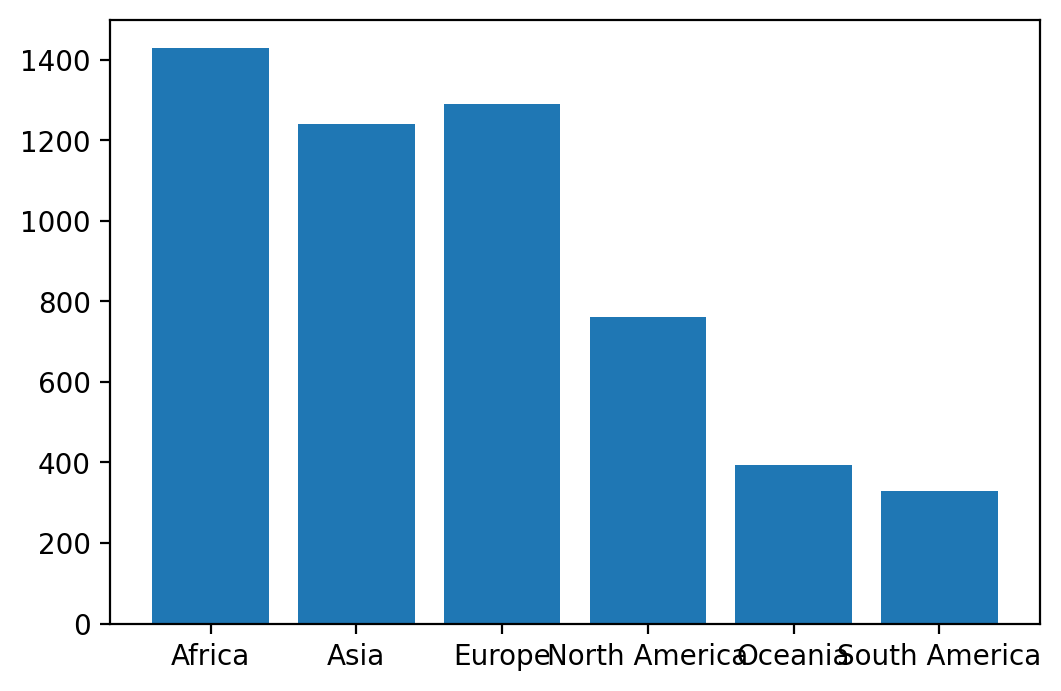

In [29]:
plt.bar(x = gdp_bar["Continent"], height = gdp_bar["Country"])
#gdp_df.bar(x = gdp_df.groupby("Continent").count())

In [30]:
print(gdp_df[gdp_df["Year"]==2014].groupby("Continent").sum())

                Year  GDP_Per_Capita
Continent                           
Africa         98686    2.928373e+05
Asia           86602    1.111780e+06
Europe         90630    1.532948e+06
North America  52364    6.189731e+05
Oceania        28196    1.621359e+05
South America  22154    1.707547e+05


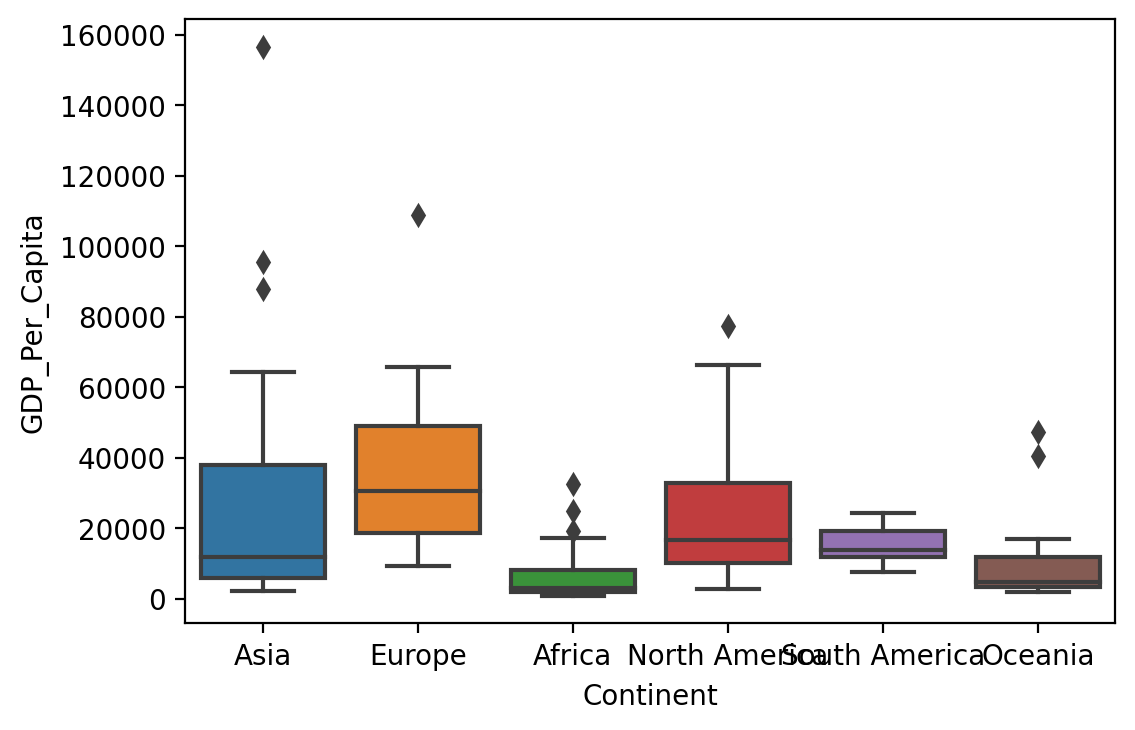

In [31]:
sns.boxplot(data = gdp_df[gdp_df["Year"]==2014],x = "Continent", y = "GDP_Per_Capita");

In [32]:
internet_df = pd.read_csv("../data/internet_use.csv", error_bad_lines=False, keep_default_na = False, skipfooter = 180, engine='python')

Skipping line 4675: ',' expected after '"'. Error could possibly be due to parsing errors in the skipped footer rows (the skipfooter keyword is only applied after Python's csv library has parsed all rows).


In [33]:
print(internet_df)

     Country or Area  Year     Value Value Footnotes
0        Afghanistan  2014  6.390000                
1        Afghanistan  2013  5.900000                
2        Afghanistan  2012  5.454545                
3        Afghanistan  2011  5.000000                
4        Afghanistan  2010  4.000000                
...              ...   ...       ...             ...
4490        Zimbabwe  1997  0.033080                
4491        Zimbabwe  1996  0.016790                
4492        Zimbabwe  1995  0.007684                
4493        Zimbabwe  1994  0.001739                
4494        Zimbabwe  1990  0.000000                

[4495 rows x 4 columns]


In [34]:
internet_df.drop("Value Footnotes", axis = 1, inplace = True)
print(internet_df)

     Country or Area  Year     Value
0        Afghanistan  2014  6.390000
1        Afghanistan  2013  5.900000
2        Afghanistan  2012  5.454545
3        Afghanistan  2011  5.000000
4        Afghanistan  2010  4.000000
...              ...   ...       ...
4490        Zimbabwe  1997  0.033080
4491        Zimbabwe  1996  0.016790
4492        Zimbabwe  1995  0.007684
4493        Zimbabwe  1994  0.001739
4494        Zimbabwe  1990  0.000000

[4495 rows x 3 columns]


In [35]:
internet_df = internet_df.rename(columns = {"Country or Area":"Country","Year":"Year","Value":"Internet_Users_Pct"})
print(internet_df)

          Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
1     Afghanistan  2013            5.900000
2     Afghanistan  2012            5.454545
3     Afghanistan  2011            5.000000
4     Afghanistan  2010            4.000000
...           ...   ...                 ...
4490     Zimbabwe  1997            0.033080
4491     Zimbabwe  1996            0.016790
4492     Zimbabwe  1995            0.007684
4493     Zimbabwe  1994            0.001739
4494     Zimbabwe  1990            0.000000

[4495 rows x 3 columns]


In [36]:
print(internet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB
None


In [37]:
print(internet_df[internet_df["Internet_Users_Pct"] > 0]["Year"].min())

1990


In [38]:
internet_use_graph = internet_df[internet_df["Internet_Users_Pct"] > 0].groupby("Year").mean()
print(internet_use_graph)

      Internet_Users_Pct
Year                    
1990            0.264891
1991            0.352641
1992            0.463997
1993            0.548085
1994            0.757138
1995            1.037218
1996            1.489119
1997            2.499435
1998            3.969595
1999            5.952221
2000            8.931045
2001           10.993860
2002           14.069361
2003           16.671270
2004           19.163051
2005           21.393010
2006           24.039098
2007           25.805788
2008           28.642722
2009           31.378214
2010           34.452751
2011           37.764590
2012           40.553698
2013           42.842633
2014           45.474975


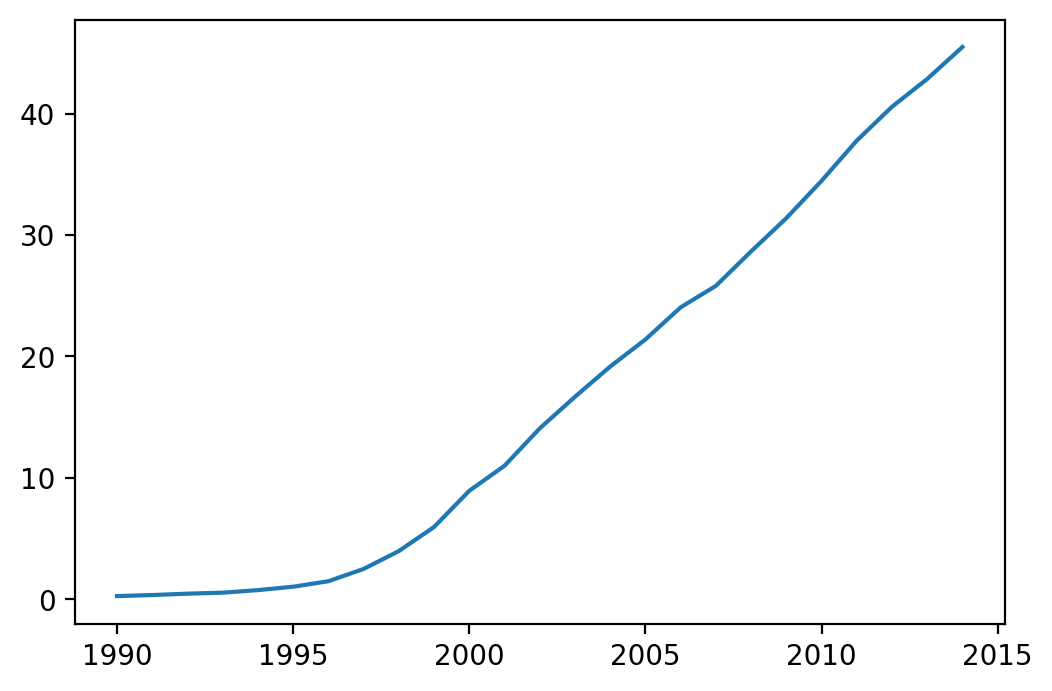

In [39]:
plt.plot(internet_use_graph)

In [40]:
un_internet = internet_df.drop_duplicates("Country")
print(un_internet)
print(len(pd.unique(internet_df["Country"])))

                    Country  Year  Internet_Users_Pct
0               Afghanistan  2014                6.39
15                  Albania  2014               60.10
36                  Algeria  2014               18.09
58           American Samoa  1990                0.00
59                  Andorra  2014               95.90
...                     ...   ...                 ...
4389               Viet Nam  2014               48.31
4409  Virgin Islands (U.S.)  2014               50.07
4431                  Yemen  2014               22.55
4451                 Zambia  2014               17.34
4473               Zimbabwe  2014               19.89

[213 rows x 3 columns]
213


In [41]:
un_gdp = gdp_df["Country"].drop_duplicates()
print(un_gdp)
print(len(pd.unique(gdp_df["Country"])))

0               Afghanistan
18                  Albania
48                  Algeria
78                   Angola
108     Antigua and Barbuda
               ...         
5297                Vanuatu
5327                Vietnam
5357     West Bank and Gaza
5383                 Zambia
5413               Zimbabwe
Name: Country, Length: 188, dtype: object
188


In [42]:
test_join = pd.merge(un_gdp, un_internet, how = "inner", on = "Country")
print(test_join)

                 Country  Year  Internet_Users_Pct
0            Afghanistan  2014                6.39
1                Albania  2014               60.10
2                Algeria  2014               18.09
3                 Angola  2014               21.26
4    Antigua and Barbuda  2014               64.00
..                   ...   ...                 ...
162              Uruguay  2014               61.46
163           Uzbekistan  2014               43.55
164              Vanuatu  2014               18.80
165               Zambia  2014               17.34
166             Zimbabwe  2014               19.89

[167 rows x 3 columns]


In [43]:
gdp_replace = ['Cabo Verde','Central African Republic', 'Dem. Rep. Congo', 'Dominican Republic', 'Hong Kong SAR, China', 'Iran', 'Korea', 'Kyrgyz Republic', 'Lao PDR', 'Macao SAR, China', 'Micronesia', 'North Macedonia', 'St. Kitts and Nevis', 'St. Lucia', 'The Bahamas', 'The Gambia', 'Vietnam', 'West Bank and Gaza']
internet_replace = ['Cape Verde', 'Central African Rep.', 'Congo (Democratic Republic of the)', 'Dominican Rep.', 'Hong Kong, China','Iran (Islamic Rep. of)', "Dem. People's Rep. of Korea", 'Kyrgyzstan', 'Lao P.D.R.', 'Macao, China', 'Micronesia (Fed. States of)', 'T.F.Y.R. Macedonia', 'Saint Kitts and Nevis', 'Saint Lucia', 'Bahamas', 'Gambia', 'Viet Nam', 'Palestine']
for x, y in zip(gdp_replace, internet_replace):
    internet_df.loc[internet_df["Country"] == y,"Country"] = x
    print("replaceing {} with {}".format(y,x))
#un_internet.loc[un_internet["Country"] == "Afghanistan"] = "AFGHANISTAN"
print(internet_df)

replaceing Cape Verde with Cabo Verde
replaceing Central African Rep. with Central African Republic
replaceing Congo (Democratic Republic of the) with Dem. Rep. Congo
replaceing Dominican Rep. with Dominican Republic
replaceing Hong Kong, China with Hong Kong SAR, China
replaceing Iran (Islamic Rep. of) with Iran
replaceing Dem. People's Rep. of Korea with Korea
replaceing Kyrgyzstan with Kyrgyz Republic
replaceing Lao P.D.R. with Lao PDR
replaceing Macao, China with Macao SAR, China
replaceing Micronesia (Fed. States of) with Micronesia
replaceing T.F.Y.R. Macedonia with North Macedonia
replaceing Saint Kitts and Nevis with St. Kitts and Nevis
replaceing Saint Lucia with St. Lucia
replaceing Bahamas with The Bahamas
replaceing Gambia with The Gambia
replaceing Viet Nam with Vietnam
replaceing Palestine with West Bank and Gaza
          Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
1     Afghanistan  2013            5.900000
2     Afghanistan  2012      

In [44]:
gdp_and_internet_use = pd.merge(gdp_df,internet_df, how = "inner", on = ["Country","Year"])
print(gdp_and_internet_use)

          Country  Year  GDP_Per_Capita Continent  Internet_Users_Pct
0     Afghanistan  2014     2102.385234      Asia            6.390000
1     Afghanistan  2013     2116.465454      Asia            5.900000
2     Afghanistan  2012     2075.491747      Asia            5.454545
3     Afghanistan  2011     1904.559799      Asia            5.000000
4     Afghanistan  2010     1957.029338      Asia            4.000000
...           ...   ...             ...       ...                 ...
3815     Zimbabwe  1997     3580.048793    Africa            0.033080
3816     Zimbabwe  1996     3520.430146    Africa            0.016790
3817     Zimbabwe  1995     3226.413930    Africa            0.007684
3818     Zimbabwe  1994     3263.934978    Africa            0.001739
3819     Zimbabwe  1990     3324.348171    Africa            0.000000

[3820 rows x 5 columns]


In [45]:
gdp_and_internet_use_2014 = gdp_and_internet_use[(gdp_and_internet_use["Year"] == 2014) & (gdp_and_internet_use["Internet_Users_Pct"] >= 90)]

In [46]:
print(gdp_and_internet_use_2014)

                   Country  Year  GDP_Per_Capita      Continent  \
228                Bahrain  2014    48201.085018           Asia   
372                Bermuda  2014    77361.104881  North America   
913                Denmark  2014    52214.537753         Europe   
1133               Finland  2014    45013.100455         Europe   
1486               Iceland  2014    49652.149500         Europe   
1691                 Japan  2014    39376.884505           Asia   
1979            Luxembourg  2014   108760.916030         Europe   
2408           Netherlands  2014    52353.666990         Europe   
2540                Norway  2014    62589.373548         Europe   
2786                 Qatar  2014    95578.416973           Asia   
3260                Sweden  2014    49416.289877         Europe   
3607  United Arab Emirates  2014    62378.657439           Asia   
3628        United Kingdom  2014    44209.510472         Europe   

      Internet_Users_Pct  
228             90.99998  
372    

In [47]:
gdp_and_internet_use_2014.sort_values("GDP_Per_Capita", ascending = False)[:3]

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
1979,Luxembourg,2014,108760.916030,Europe,94.67
2786,Qatar,2014,95578.416973,Asia,91.49
372,Bermuda,2014,77361.104881,North America,96.80


In [48]:
gdp_top_countries = gdp_and_internet_use[(gdp_and_internet_use["Country"] == "Luxembourg") | (gdp_and_internet_use["Country"] == "Qatar") | (gdp_and_internet_use["Country"] == "Bermuda")]

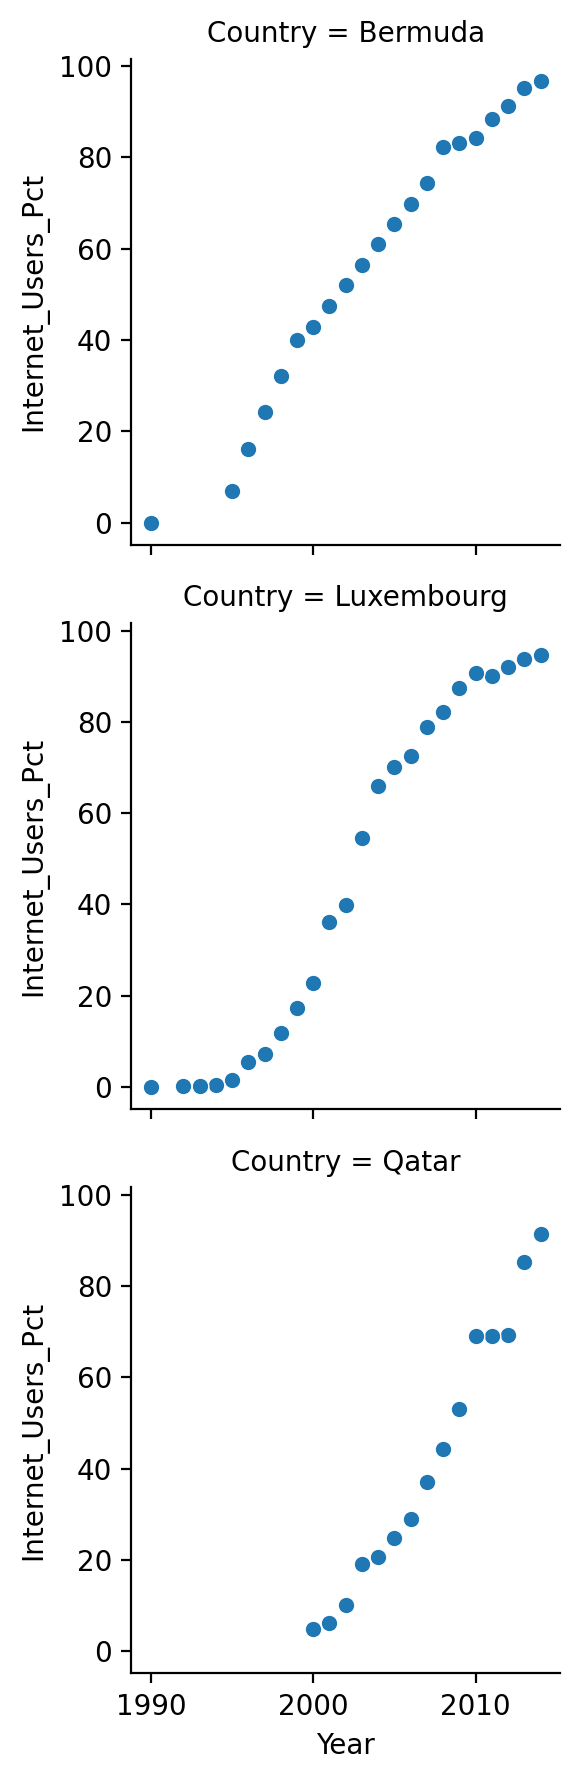

In [49]:
top_gdp_countries = sns.FacetGrid(gdp_top_countries, row = "Country")
top_gdp_countries.map(sns.scatterplot,"Year","Internet_Users_Pct")

In [50]:
gdp_and_internet_use_2014["GDP_Per_Capita"].corr(gdp_and_internet_use_2014["Internet_Users_Pct"])

0.18806598556644713

In [51]:
gdp_and_internet_use_2014["GDP_Log"] = np.log(gdp_and_internet_use_2014["GDP_Per_Capita"])

<ipython-input-51-99e3b429c361>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014["GDP_Log"] = np.log(gdp_and_internet_use_2014["GDP_Per_Capita"])


In [52]:
gdp_and_internet_use_2014["GDP_Log"].corr(gdp_and_internet_use_2014["Internet_Users_Pct"])

0.23444654655508249

In [53]:
us_gdp = gdp_and_internet_use[gdp_and_internet_use["Country"] == "United States"]

In [54]:
us_gdp["GDP_Per_Capita"].corr(us_gdp["Internet_Users_Pct"])

0.9916600677832935

In [55]:
ag_df = pd.read_csv("../data/UNdata_export_Ag_Land.csv")

In [56]:
ag_df = ag_df.drop(["Element","Value Footnotes"],1)

In [57]:
ag_df.head()

,Country or Area,Year,Unit,Value
0,Afghanistan,2018.0,1000 ha,37919.0
1,Afghanistan,2017.0,1000 ha,37910.0
2,Afghanistan,2016.0,1000 ha,37910.0
3,Afghanistan,2015.0,1000 ha,37910.0
4,Afghanistan,2014.0,1000 ha,37910.0


In [58]:
ag_df = ag_df.rename(columns = {"Country or Area":"Country","Year":"Year","Value":"Ag Land"})
ag_df = ag_df.dropna()
ag_df = ag_df.astype({"Country": str,"Year": int, "Ag Land": int})

In [59]:
print(ag_df)

           Country  Year     Unit  Ag Land
0      Afghanistan  2018  1000 ha    37919
1      Afghanistan  2017  1000 ha    37910
2      Afghanistan  2016  1000 ha    37910
3      Afghanistan  2015  1000 ha    37910
4      Afghanistan  2014  1000 ha    37910
...            ...   ...      ...      ...
14364     Zimbabwe  1965  1000 ha    11305
14365     Zimbabwe  1964  1000 ha    11240
14366     Zimbabwe  1963  1000 ha    11155
14367     Zimbabwe  1962  1000 ha    11070
14368     Zimbabwe  1961  1000 ha    10985

[14369 rows x 4 columns]


In [60]:
gdp_and_internet_use_and_ag = pd.merge(gdp_and_internet_use,ag_df, how = "inner", on = ["Country","Year"])

In [61]:
gdp_and_internet_use_and_ag.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Unit,Ag Land
0,Afghanistan,2014,2102.385234,Asia,6.390000,1000 ha,37910
1,Afghanistan,2013,2116.465454,Asia,5.900000,1000 ha,37910
2,Afghanistan,2012,2075.491747,Asia,5.454545,1000 ha,37910
3,Afghanistan,2011,1904.559799,Asia,5.000000,1000 ha,37910
4,Afghanistan,2010,1957.029338,Asia,4.000000,1000 ha,37911


In [62]:
ag_1961 = ag_df[ag_df["Year"] == 1961]
ag_2018 = ag_df[ag_df["Year"] == 2018]

In [63]:
ag_1961 = ag_1961.rename(columns = {"Ag Land":"1961_Ag"})
ag_2018 = ag_2018.rename(columns = {"Ag Land":"2018_Ag"})
ag_61_18 = pd.merge(ag_1961,ag_2018, how = "inner", on = ["Country"])

In [64]:
print(ag_61_18)

            Country  Year_x   Unit_x  1961_Ag  Year_y   Unit_y  2018_Ag
0       Afghanistan    1961  1000 ha    37700    2018  1000 ha    37919
1            Africa    1961  1000 ha  1041602    2018  1000 ha  1121810
2           Albania    1961  1000 ha     1232    2018  1000 ha     1174
3           Algeria    1961  1000 ha    45471    2018  1000 ha    41358
4    American Samoa    1961  1000 ha        3    2018  1000 ha        4
..              ...     ...      ...      ...     ...      ...      ...
223  Western Sahara    1961  1000 ha     5000    2018  1000 ha     5004
224           World    1961  1000 ha  4469406    2018  1000 ha  4801370
225           Yemen    1961  1000 ha    23337    2018  1000 ha    23387
226          Zambia    1961  1000 ha    19307    2018  1000 ha    23836
227        Zimbabwe    1961  1000 ha    10985    2018  1000 ha    16200

[228 rows x 7 columns]


In [65]:
ag_61_18["Ag Diff"] = ag_61_18["2018_Ag"] - ag_61_18["1961_Ag"]
print(ag_61_18)

            Country  Year_x   Unit_x  1961_Ag  Year_y   Unit_y  2018_Ag  \
0       Afghanistan    1961  1000 ha    37700    2018  1000 ha    37919   
1            Africa    1961  1000 ha  1041602    2018  1000 ha  1121810   
2           Albania    1961  1000 ha     1232    2018  1000 ha     1174   
3           Algeria    1961  1000 ha    45471    2018  1000 ha    41358   
4    American Samoa    1961  1000 ha        3    2018  1000 ha        4   
..              ...     ...      ...      ...     ...      ...      ...   
223  Western Sahara    1961  1000 ha     5000    2018  1000 ha     5004   
224           World    1961  1000 ha  4469406    2018  1000 ha  4801370   
225           Yemen    1961  1000 ha    23337    2018  1000 ha    23387   
226          Zambia    1961  1000 ha    19307    2018  1000 ha    23836   
227        Zimbabwe    1961  1000 ha    10985    2018  1000 ha    16200   

     Ag Diff  
0        219  
1      80208  
2        -58  
3      -4113  
4          1  
..       

In [66]:
#ag_df = ag_df.drop(["Element","Value Footnotes"],1)
ag_61_18 = ag_61_18.drop(["Year_x","Unit_x","1961_Ag","Year_y","Unit_y","2018_Ag"],1)
ag_61_18 = ag_61_18.sort_values("Ag Diff", ascending = False)
print(ag_61_18[-30:-10])

                                               Country  Ag Diff
211  United Kingdom of Great Britain and Northern I...    -2450
104                                              Japan    -2690
80                                             Germany    -2730
82                                              Greece    -2807
78                                               Gabon    -2983
34                                              Canada    -3644
3                                              Algeria    -4113
187                                       South Africa    -4994
135                                         Mozambique    -5236
143                                        New Zealand    -5310
190                                    Southern Africa    -5359
162                                             Poland    -5810
75                                              France    -5879
191                                      Southern Asia    -6273
193                                     

In [67]:
gdp_internet_and_diff = pd.merge(gdp_and_internet_use,ag_61_18, how = "inner", on = ["Country"])
print(gdp_internet_and_diff)

          Country  Year  GDP_Per_Capita Continent  Internet_Users_Pct  Ag Diff
0     Afghanistan  2014     2102.385234      Asia            6.390000      219
1     Afghanistan  2013     2116.465454      Asia            5.900000      219
2     Afghanistan  2012     2075.491747      Asia            5.454545      219
3     Afghanistan  2011     1904.559799      Asia            5.000000      219
4     Afghanistan  2010     1957.029338      Asia            4.000000      219
...           ...   ...             ...       ...                 ...      ...
2891     Zimbabwe  1997     3580.048793    Africa            0.033080     5215
2892     Zimbabwe  1996     3520.430146    Africa            0.016790     5215
2893     Zimbabwe  1995     3226.413930    Africa            0.007684     5215
2894     Zimbabwe  1994     3263.934978    Africa            0.001739     5215
2895     Zimbabwe  1990     3324.348171    Africa            0.000000     5215

[2896 rows x 6 columns]


In [68]:
gdp_top_countries_with_ag = gdp_and_internet_use_and_ag[(gdp_and_internet_use_and_ag["Country"] == "Brazil") | (gdp_and_internet_use_and_ag["Country"] == "Indonesia") | (gdp_and_internet_use_and_ag["Country"] == "Nigeria") | (gdp_and_internet_use_and_ag["Country"] == "Mexico") | (gdp_and_internet_use_and_ag["Country"] == "Japan") | (gdp_and_internet_use_and_ag["Country"] == "Italy")]

In [69]:
gdp_top_countries_with_ag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 438 to 2283
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             142 non-null    object 
 1   Year                142 non-null    int64  
 2   GDP_Per_Capita      142 non-null    float64
 3   Continent           142 non-null    object 
 4   Internet_Users_Pct  142 non-null    float64
 5   Unit                142 non-null    object 
 6   Ag Land             142 non-null    int32  
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 8.3+ KB


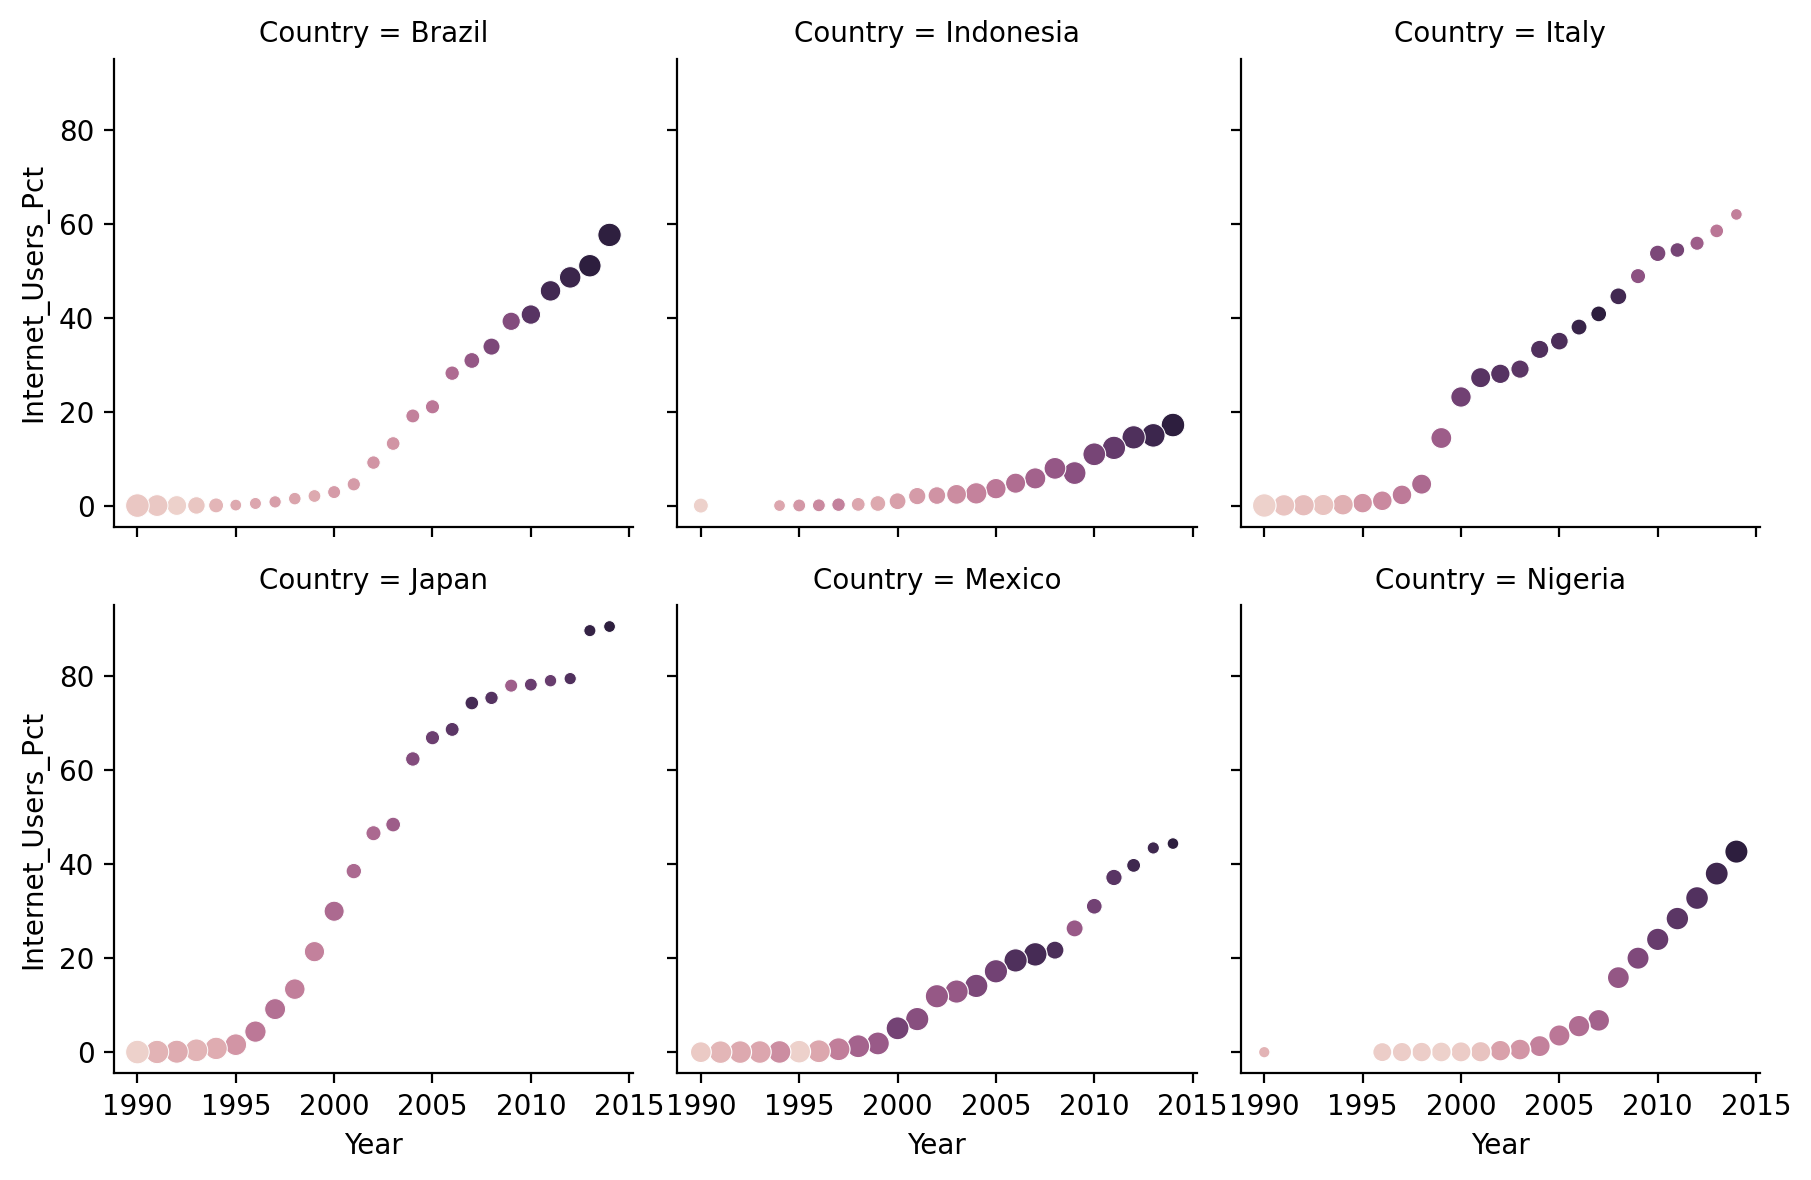

In [70]:
top_gdp_countries_with_ag = sns.FacetGrid(gdp_top_countries_with_ag, col = "Country", col_wrap = 3)
top_gdp_countries_with_ag.map(sns.scatterplot,"Year","Internet_Users_Pct","GDP_Per_Capita","Ag Land")

In [71]:
gdp_and_internet_use_mean = gdp_and_internet_use.groupby("Year").mean()
world_combined = pd.merge(gdp_and_internet_use_mean,ag_df[ag_df["Country"]=="World"], how = "inner", on = ["Year"])

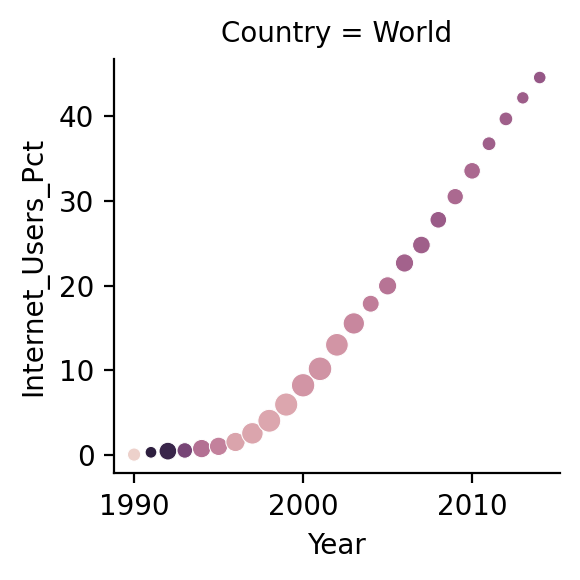

In [72]:
ag_diff_world = world_combined
world_with_ag = sns.FacetGrid(world_combined, row = "Country")
world_with_ag.map(sns.scatterplot,"Year","Internet_Users_Pct","GDP_Per_Capita","Ag Land")